In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Crop production.csv")

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [7]:
df.shape

(246091, 7)

In [8]:
df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [9]:
df['Production'].isna().sum()

3730

In [10]:
Frames=[]
for i in list (set(df['District_Name'])):
  df_district=df[df['District_Name']==i]
  df_district['Production'].fillna(df_district['Production'].mean(),inplace=True)
  Frames.append(df_district)
  final_df= pd.concat(Frames)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
final_df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
dtype: bool

In [12]:
final_df.duplicated(subset=None,keep='first').any()

False

### **Checking for correlation between variables**

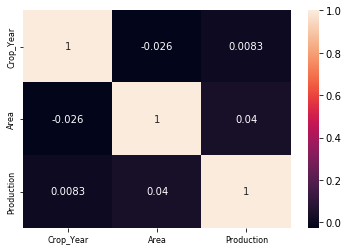

In [13]:
plt.tick_params(labelsize=8)
sns.heatmap(final_df.corr(),annot=True)

**Result :** There is no high relationship between any variables

## **Univariate Analysis**

### **State Name variable**

In [14]:
print(final_df['State_Name'].nunique())
print(final_df['State_Name'].unique())

33
['Odisha' 'Arunachal Pradesh' 'Jammu and Kashmir ' 'Madhya Pradesh'
 'Punjab' 'Rajasthan' 'Uttarakhand' 'Andhra Pradesh' 'West Bengal'
 'Uttar Pradesh' 'Haryana' 'Tamil Nadu' 'Andaman and Nicobar Islands'
 'Maharashtra' 'Kerala' 'Gujarat' 'Sikkim' 'Meghalaya' 'Karnataka' 'Bihar'
 'Chhattisgarh' 'Jharkhand' 'Assam' 'Manipur' 'Mizoram' 'Tripura'
 'Nagaland' 'Telangana ' 'Dadra and Nagar Haveli' 'Himachal Pradesh'
 'Chandigarh' 'Puducherry' 'Goa']


In [15]:
final_df['State_Name'].value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

**Result:** We have totally 33 unique states and we have more data from the top rich agriculture states like Uttar pradhesh , Madhya Pradesh and Karnataka

### **District Name variable**

In [16]:
print(final_df['District_Name'].nunique())
print(final_df['District_Name'].unique())

646
['CUTTACK' 'TIRAP' 'LEH LADAKH' 'SIDHI' 'SANGRUR' 'TONK' 'BALESHWAR'
 'CHAMPAWAT' 'PRAKASAM' 'MEDINIPUR EAST' 'FIROZEPUR' 'LUCKNOW' 'FATEHABAD'
 'UDHAMPUR' 'KANNIYAKUMARI' 'COOCHBEHAR' 'ETAH' 'UMARIA' 'HOSHIARPUR'
 'NICOBARS' 'PUNE' 'PATHANAMTHITTA' 'AMBEDKAR NAGAR' 'KHEDA'
 'NORTH DISTRICT' 'SAMBALPUR' 'NABARANGPUR' 'SOUTH WEST KHASI HILLS'
 'KOLAR' 'BEED' 'YADGIR' 'DHARWAD' 'KOTTAYAM' 'HOSHANGABAD' 'LAKHISARAI'
 'MUKTSAR' 'GONDIA' 'VALSAD' 'KATHUA' 'UJJAIN' 'RATLAM'
 '24 PARAGANAS NORTH' 'GAUTAM BUDDHA NAGAR' 'HOWRAH' 'BAHRAICH' 'PATAN'
 'YAMUNANAGAR' 'BARABANKI' 'EAST GARO HILLS' 'KOREA' 'DHANBAD' 'ERODE'
 'IDUKKI' 'SUPAUL' 'TUMKUR' 'AGRA' 'SITAPUR' 'GADCHIROLI'
 'BENGALURU URBAN' 'PANNA' 'PATNA' 'ALAPPUZHA' 'S.A.S NAGAR' 'MUNGER'
 'KHARGONE' 'GHAZIABAD' 'SHAHDOL' 'KHERI' 'DHUBRI' 'KAUSHAMBI' 'NASHIK'
 'DOHAD' 'THIRUVALLUR' 'TAMENGLONG' 'SIMDEGA' 'CHAMPHAI' 'ANANTAPUR'
 'JAJAPUR' 'DHOLPUR' 'BANKURA' 'SEONI' 'RAJNANDGAON' 'HARDA' 'JALGAON'
 'AMRITSAR' 'UNAKOTI' 'KARIMGANJ' 'FATEH

In [17]:
final_df['District_Name'].value_counts()

BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
MUMBAI         1
NAMSAI         1
Name: District_Name, Length: 646, dtype: int64

**Result** : On district front we have more data coming from Bijapur , Tumkur followed by Belgaum , Hassan and Bellary

### **Crop year variable** 

In [18]:
print(final_df['Crop_Year'].nunique())
print(final_df['Crop_Year'].max())
print(final_df['Crop_Year'].min())

19
2015
1997


In [19]:
final_df.Crop_Year.value_counts()

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64

**Result** : Data consists for India crop production from 1997 to 2015 , more vital data from 2003 and 2002.

### **Season variable**

In [20]:
final_df['Season'].nunique()

6

In [21]:
final_df['Season'].max()

'Winter     '

In [22]:
final_df['Season'].value_counts()

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

**Result** : More crops has been yeilded on winter season but more data points from Kharif followed by Rabi and whole year season

### **Crop variable** 

In [23]:
print(final_df['Crop'].nunique())
print(final_df.Crop.value_counts().head(10))

124
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: Crop, dtype: int64


In [24]:
final_df['Crop'].max()

'other oilseeds'

In [25]:
final_df['Crop'].unique()

array(['Groundnut', 'Jute', 'Maize', 'Paddy', 'Ragi', 'Arhar/Tur',
       'Horse-gram', 'Sesamum', 'Urad', 'Potato', 'Sugarcane', 'Rice',
       'Moong(Green Gram)', 'Wheat', 'Rapeseed &Mustard', 'Castor seed',
       'Dry chillies', 'Dry ginger', 'Jowar', 'Mesta', 'Sweet potato',
       'Turmeric', 'Coriander', 'Garlic', 'Gram', 'Linseed', 'Sunflower',
       'Onion', 'Other Kharif pulses', 'Other  Rabi pulses', 'Safflower',
       'Small millets', 'Soyabean', 'Oilseeds total', 'Pulses total',
       'Barley', 'Masoor', 'Peas & beans (Pulses)', 'Carrot',
       'Other Fresh Fruits', 'Other Vegetables', 'Turnip',
       'Other Cereals & Millets', 'Bajra', 'Cotton(lint)', 'Niger seed',
       'Sannhamp', 'Banana', 'Tobacco', 'Bhindi', 'Brinjal', 'Cabbage',
       'Cauliflower', 'Mango', 'Papaya', 'Tomato', 'Pome Fruit',
       'Khesari', 'Cowpea(Lobia)', 'Moth', 'Guar seed', 'Tapioca',
       'Citrus Fruit', 'Orange', 'Water Melon', 'Grapes',
       'other oilseeds', 'Ginger', 'Total fo

**Result** : 124 Unique crops available

In [26]:
final_df.Production.describe()

count    2.460910e+05
mean     6.069226e+05
std      1.696894e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.880000e+02
75%      7.870000e+03
max      1.250800e+09
Name: Production, dtype: float64

**Result**: Production value ranges from 0 to 1250800

{'whiskers': [<matplotlib.lines.Line2D at 0x7f348fea8610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34942d3550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34942d3f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f348fea8fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f348ffeec10>],
 'means': []}

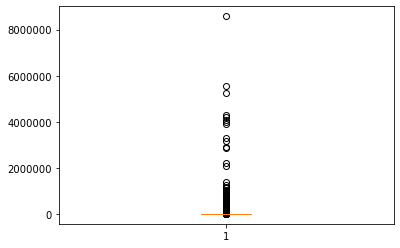

In [27]:
plt.boxplot(final_df.Area)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f348ff01d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f348fe909d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34942d0590>],
 'medians': [<matplotlib.lines.Line2D at 0x7f348ff019d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f348fdb1850>],
 'means': []}

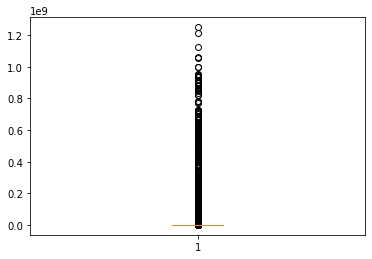

In [28]:
plt.boxplot(final_df.Production)

**Result:** The area under cultivation and production is highly skewed and has many outliers

## **Bivariate Analysis**

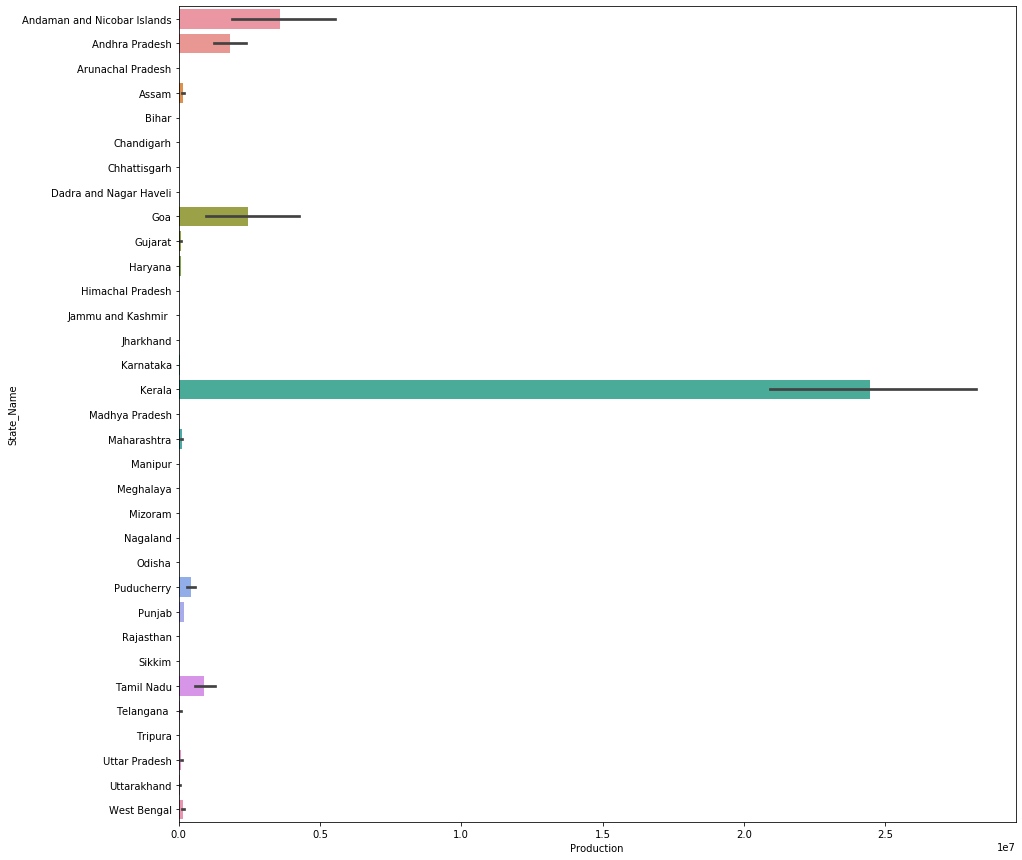

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['Production'],y= df["State_Name"], orient='h');

**Result** : Kerala has yeilded the highest production 

## **New variables**

In [30]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [31]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

final_df['Zones'] = final_df.apply(get_zonal_names, axis=1)
final_df['Zones'].unique()

array(['East Zone', 'NE Zone', 'North Zone', 'Central Zone', 'West Zone',
       'South Zone', 'Union Terr'], dtype=object)

In [32]:
final_df['Zones'].value_counts()

South Zone      54207
North Zone      51468
East Zone       43339
West Zone       33786
Central Zone    33652
NE Zone         28297
Union Terr       1342
Name: Zones, dtype: int64

In [33]:
crop=final_df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

final_df['cat_crop']=final_df['Crop'].apply(cat_crop)

In [34]:
final_df['cat_crop'].value_counts()

Cereal        63800
Pulses        41689
oilseeds      34454
Vegetables    23325
spices        21986
Nuts          11588
Commercial    10716
fibres        10195
Beans          9355
Fruits         6243
Name: cat_crop, dtype: int64

## **Findings and Visualisations**

### **Zone wise production**

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Zone wise total production')

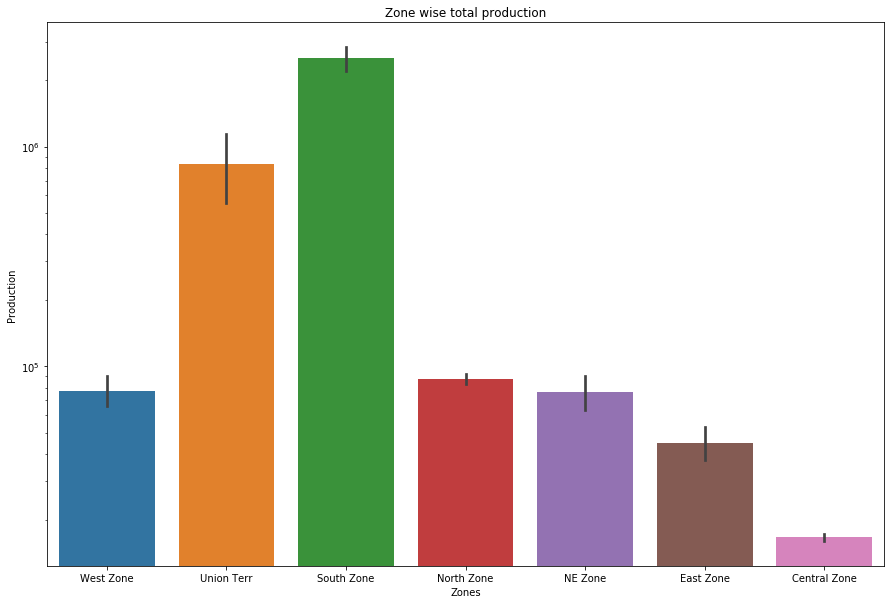

In [35]:
fig ,ax = plt.subplots(figsize=(15,10))
sns.barplot(final_df.Zones.sort_values(ascending=False) , final_df.Production)
plt.yscale('log')
plt.title('Zone wise total production')

**Result :** South zone supplies the highest production followed by the union territories

### **Analysing the state in south zone which produces the highest production**

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Southern-Zone wise Production')

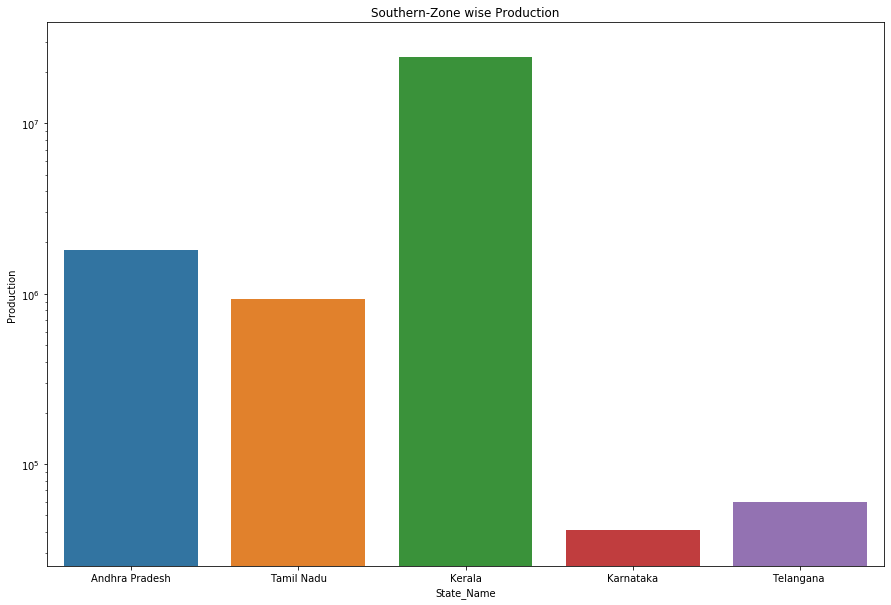

In [36]:
south_zone =  final_df[(final_df["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone wise Production')

**Result** : Kerala provides the highest production in south zone

### **Analysing the district zone in kerala which gives the highest production**

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Kerala district wise Production')

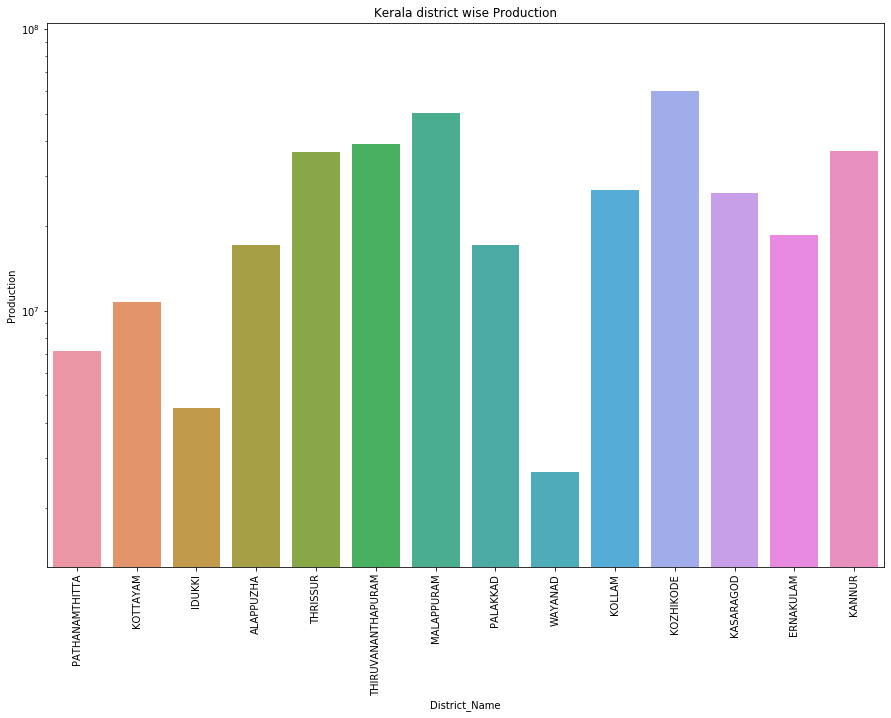

In [37]:
Kerala =  final_df[(final_df["State_Name"] == 'Kerala')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(Kerala.District_Name, Kerala.Production,errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Kerala district wise Production')

**Result** : Kozhikode , Malappuram and Thiruvananthapuram gives the highest production in Kerala state

### **Crop wise production**

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Overall Crops vs Production')

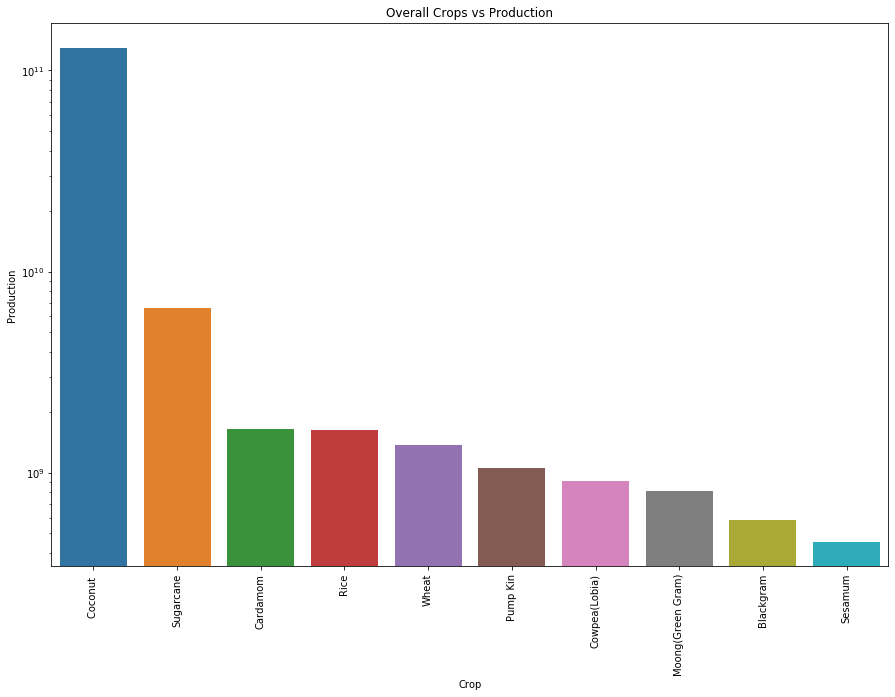

In [38]:
crop = final_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Overall Crops vs Production')


**Result:** Coconut is the top production followed by Sugar crane and Cardamom

### **Season wise productions**

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Seasonal Crops vs Production')

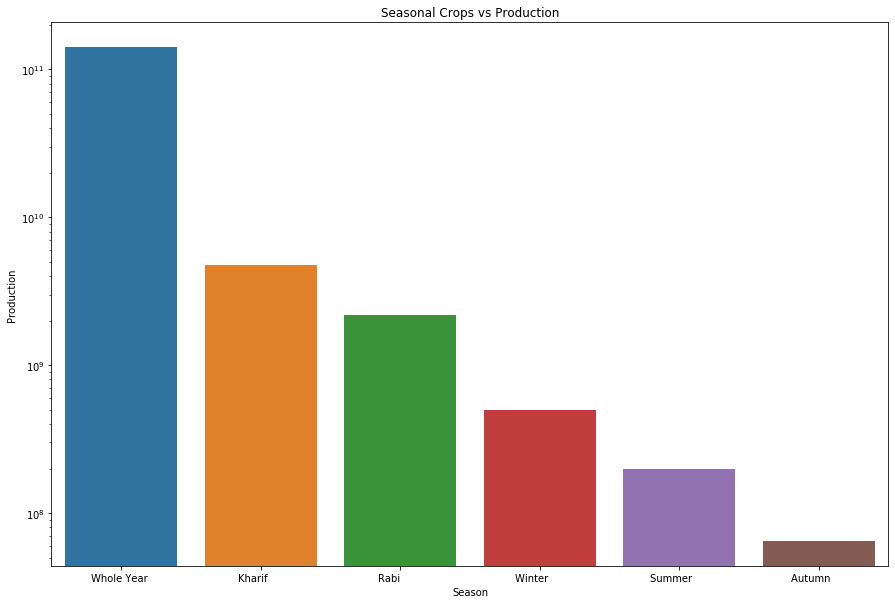

In [39]:
season = final_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

**Result:** More productions can be witnessed in WHOLE YEAR followed by Kharif and Rabi.

### **Year vs Production Analysis**

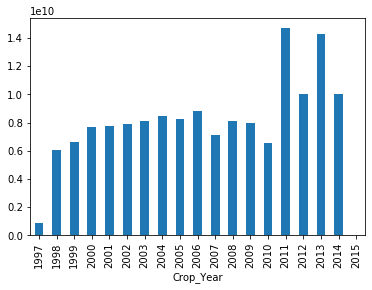

In [40]:
plt.tick_params(labelsize=10)
final_df.groupby('Crop_Year')['Production'].agg('sum').plot.bar()



**Result:** More productions was witnessed in 2011 followed by 2013.

### **Crop categories vs Production**

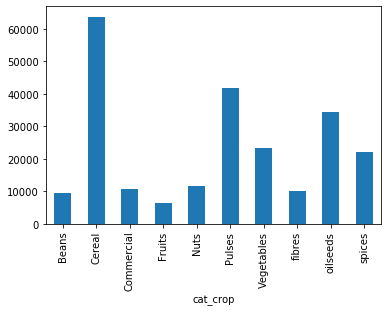

In [41]:
final_df.groupby('cat_crop')['Production'].agg("count").plot.bar()
plt.tick_params(labelsize=10)

**Result:** Cereals has the highest production followed by pulses and oilseeds

### **Season vs Crop categories vs State**

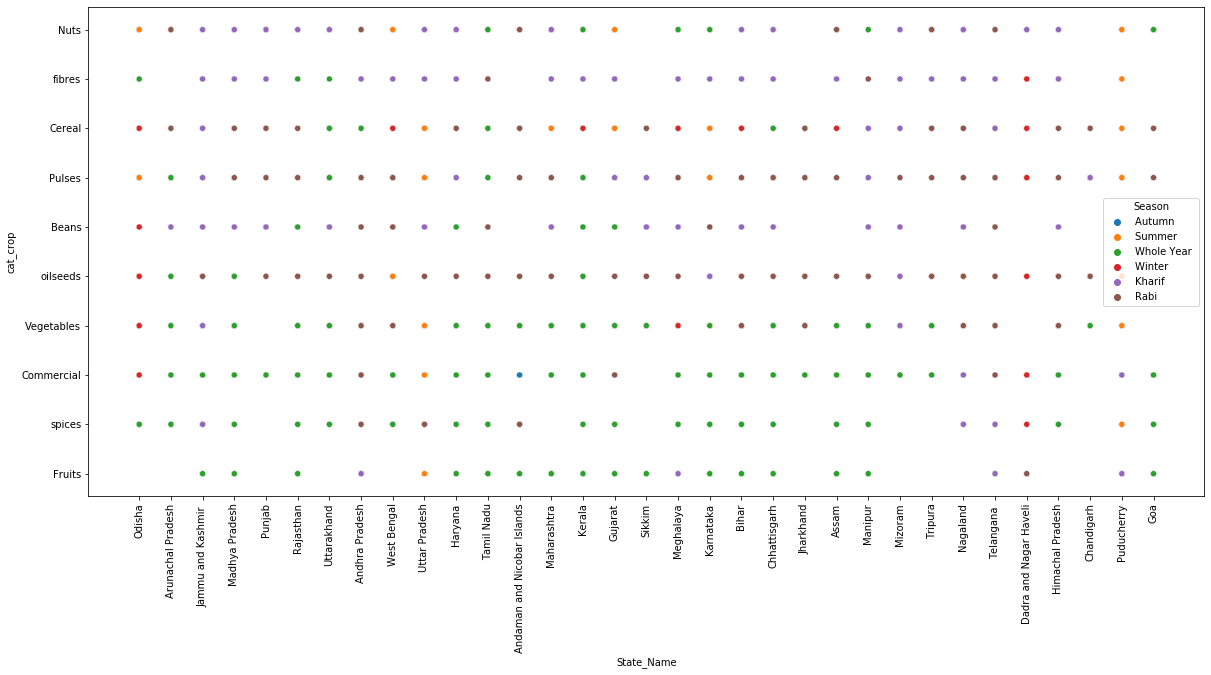

In [42]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.scatterplot(data = final_df , x="State_Name", y="cat_crop", hue='Season')
plt.show()

**Result:** Top agriculture rich state like Uttar pradesh produce abundance of Kharif crops , Kerala produces abundance of whole year crops

### **Percentage of crop categories**

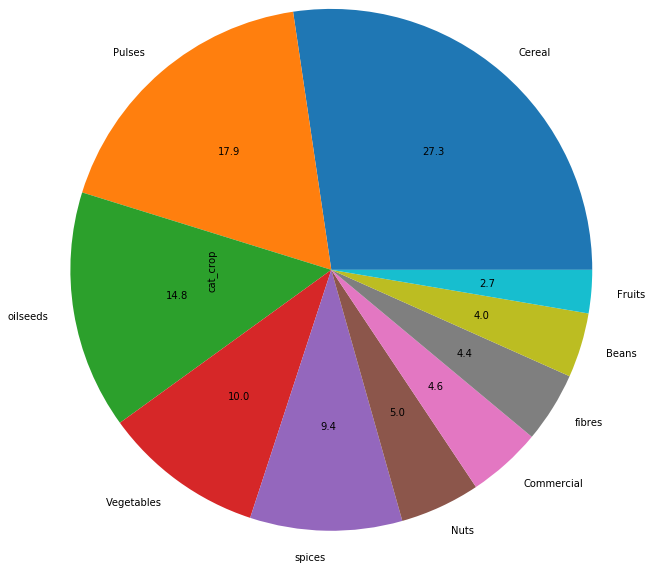

In [43]:
cat_crop_count_df=final_df["cat_crop"].value_counts()
cat_crop_count_df.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

**Result**: Cereals production was greater followed by Pulses and oilseeds

## **Key Indicators and obtaining useful insights**

### **State that dominates in crop production by producing a variety of crop categories** 

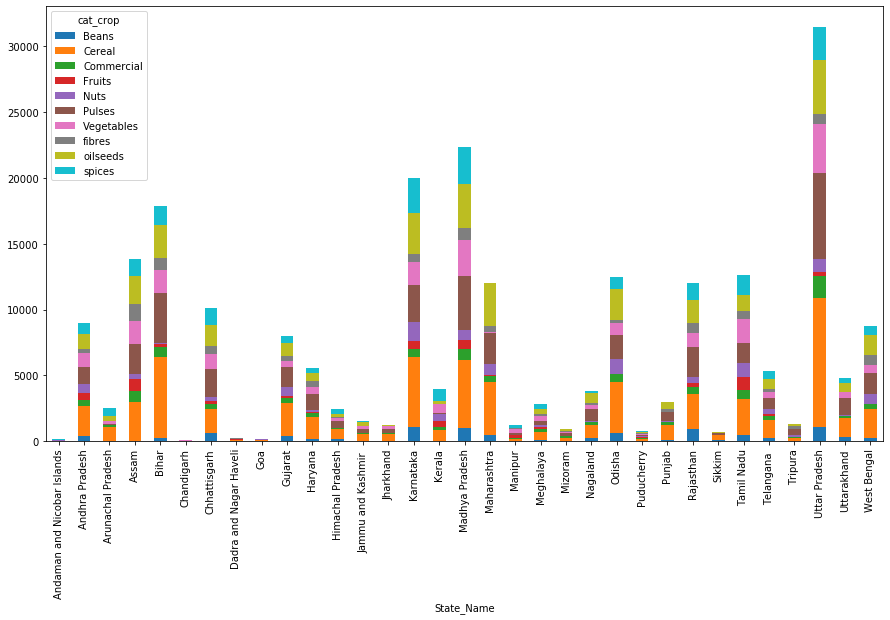

In [44]:
state_cat_crop= pd.crosstab(final_df['State_Name'],final_df['cat_crop'])
state_cat_crop.plot(kind="bar",stacked=True,figsize=(15,8))

**Result** : Uttar Pradhesh produces a various of crop categories and dominates in high production rank followed by Madhya pradesh and Karnataka

### **Which crop is grown in high frequency in India? Provide useful insights for the same**

In [45]:
final_df['Crop'].value_counts()[:5]

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: Crop, dtype: int64

In [46]:
rice_df=final_df[final_df['Crop']=="Rice"]
print(rice_df.shape)
rice_df.head(4)

(15104, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
149516,Odisha,CUTTACK,1998,Autumn,Rice,14695.0,19134.0,East Zone,Cereal
149523,Odisha,CUTTACK,1998,Summer,Rice,8150.0,13477.0,East Zone,Cereal
149534,Odisha,CUTTACK,1998,Winter,Rice,127524.0,225009.0,East Zone,Cereal
149538,Odisha,CUTTACK,1999,Autumn,Rice,9000.0,11000.0,East Zone,Cereal


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


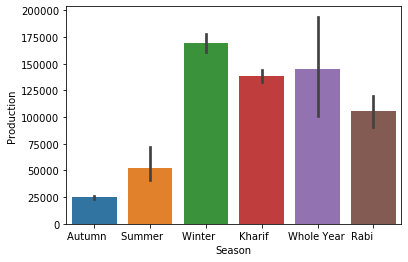

In [47]:
sns.barplot("Season","Production",data=rice_df)


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

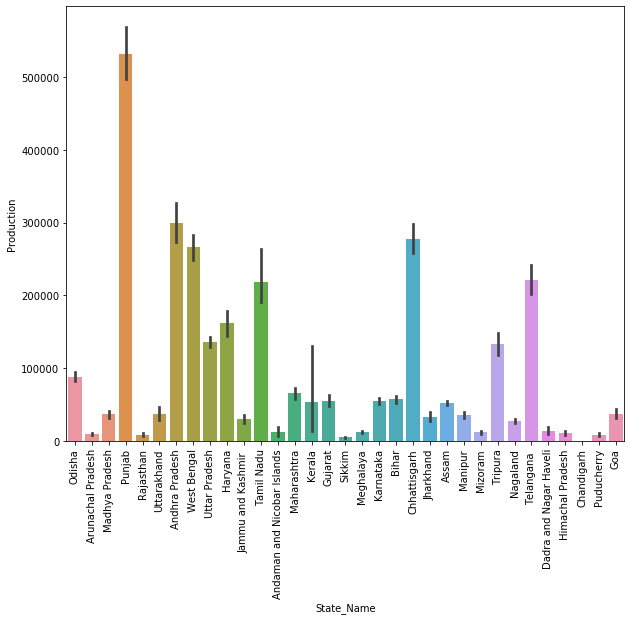

In [48]:
plt.figure(figsize=(10,8))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show


In [49]:
top_rice_dist = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_rice_dist.head(5)

,District_Name,Production
58,BARDHAMAN,3.423998e+07
375,MEDINIPUR WEST,2.919272e+07
613,WEST GODAVARI,2.784531e+07
316,KOLLAM,2.695188e+07
169,EAST GODAVARI,2.469093e+07


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

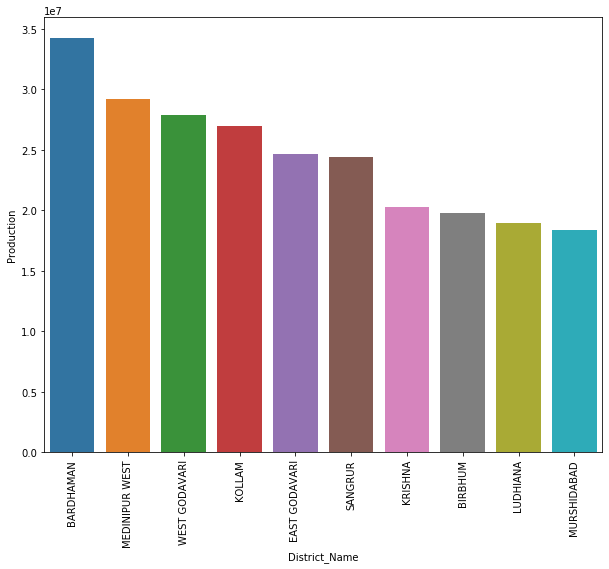

In [50]:
plt.figure(figsize=(10,8))
sns.barplot("District_Name","Production",data=top_rice_dist[:10])
plt.xticks(rotation=90)
plt.show

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


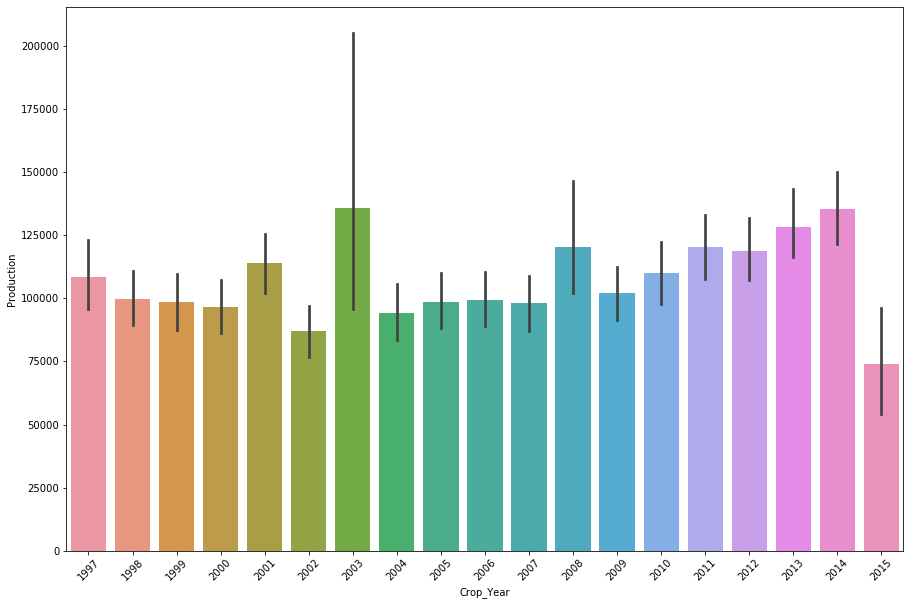

In [51]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


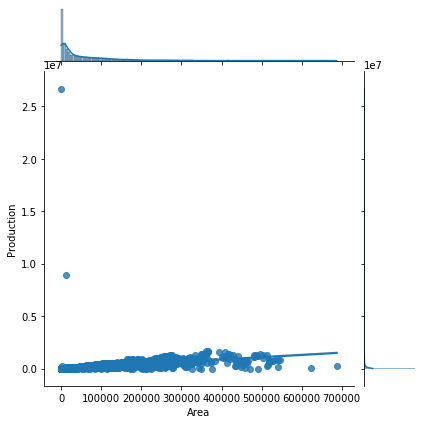

In [52]:
sns.jointplot("Area","Production",data=rice_df,kind="reg")

**Result**:
1. Rice is the most frequent crop in India.
2. Rice is produced in high is Winter season followed by Whole year and Kharif
3. Punjab is richest state for high rice production.
4. Bardaman district in Punjab is rich for rice production

### **State that ranks high in area wise crop production in India**

In [53]:
df_area=final_df.groupby("State_Name")["Area"].sum().reset_index().sort_values(by="Area",ascending=False)
df_area.head()

,State_Name,Area
30,Uttar Pradesh,4.336316e+08
16,Madhya Pradesh,3.298131e+08
17,Maharashtra,3.222062e+08
25,Rajasthan,2.720249e+08
32,West Bengal,2.154052e+08


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Indian Agricultural Area Distribution')

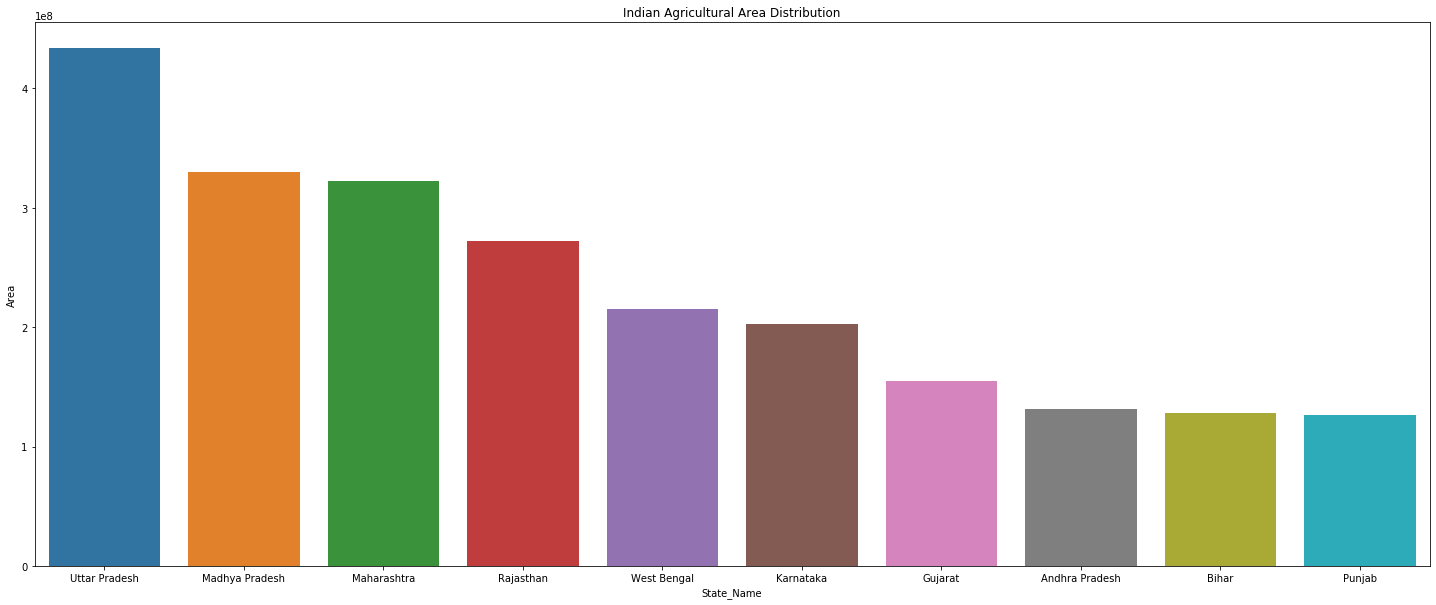

In [54]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(df_area.State_Name.head(10), df_area.Area.head(10), errwidth=0)
plt.title('Indian Agricultural Area Distribution')


**Result:** Top crop producing states based on Area are Uttar Pradhesh followed by Madhya Pradhesh and Maharashtra

### **Top Crops produced in Northern parts of State**

In [55]:
North_Zone=final_df[final_df["Zones"]=="North Zone"]
print(North_Zone.shape)
        

(51468, 9)


In [56]:
North_Zone.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
74871,Jammu and Kashmir,LEH LADAKH,1997,Rabi,Wheat,3725.0,2920.0,North Zone,Cereal
74872,Jammu and Kashmir,LEH LADAKH,1999,Rabi,Barley,155.0,137.6,North Zone,Cereal
74873,Jammu and Kashmir,LEH LADAKH,1999,Rabi,Gram,4822.0,2748.4,North Zone,Pulses
74874,Jammu and Kashmir,LEH LADAKH,1999,Rabi,Rapeseed &Mustard,21.0,15.8,North Zone,oilseeds
74875,Jammu and Kashmir,LEH LADAKH,2000,Rabi,Barley,162.0,143.0,North Zone,Cereal


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,State_Name,Production
5,Uttar Pradesh,3.248159e+09
4,Punjab,5.905425e+08
1,Haryana,4.930824e+08
6,Uttarakhand,1.344728e+08
2,Himachal Pradesh,1.823680e+07
3,Jammu and Kashmir,1.331539e+07
0,Chandigarh,6.467511e+04


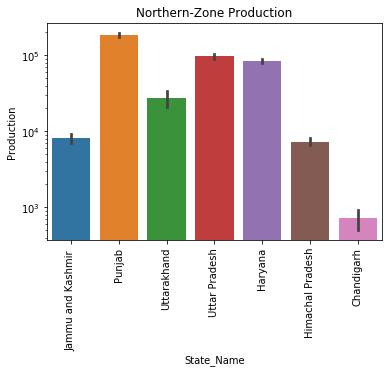

In [57]:
sns.barplot(North_Zone.State_Name,North_Zone.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Northern-Zone Production')

North_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Crop vs Production in Northern-Zone')

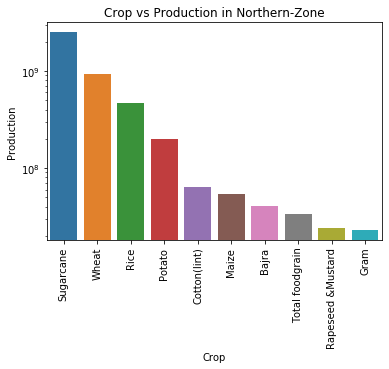

In [58]:
df_NZ= North_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(df_NZ.Crop, df_NZ.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Crop vs Production in Northern-Zone')

**Result**:
1. Top crop producing states in North parts are Punjab followed by Uttar pradhesh
2. Top crops produced in Northern zone are Sugar cane followed by Wheat. 

### **Top crop produced in Southern Zone**

In [59]:
South_Zone=final_df[final_df["Zones"]=="South Zone"]
print(South_Zone.shape)

(54207, 9)


In [60]:
South_Zone.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
5520,Andhra Pradesh,PRAKASAM,1997,Kharif,Arhar/Tur,34700.0,2200.0,South Zone,Pulses
5521,Andhra Pradesh,PRAKASAM,1997,Kharif,Bajra,12200.0,11600.0,South Zone,Cereal
5522,Andhra Pradesh,PRAKASAM,1997,Kharif,Castor seed,7200.0,900.0,South Zone,oilseeds
5523,Andhra Pradesh,PRAKASAM,1997,Kharif,Cotton(lint),39900.0,47500.0,South Zone,fibres
5524,Andhra Pradesh,PRAKASAM,1997,Kharif,Dry chillies,7100.0,7100.0,South Zone,spices
5525,Andhra Pradesh,PRAKASAM,1997,Kharif,Groundnut,7000.0,4300.0,South Zone,Nuts
5526,Andhra Pradesh,PRAKASAM,1997,Kharif,Jowar,3700.0,2100.0,South Zone,Cereal
5527,Andhra Pradesh,PRAKASAM,1997,Kharif,Korra,1400.0,1400.0,South Zone,Pulses
5528,Andhra Pradesh,PRAKASAM,1997,Kharif,Maize,1800.0,8100.0,South Zone,Cereal
5529,Andhra Pradesh,PRAKASAM,1997,Kharif,Moong(Green Gram),6000.0,2300.0,South Zone,None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Crop vs Production in Southern-Zone')

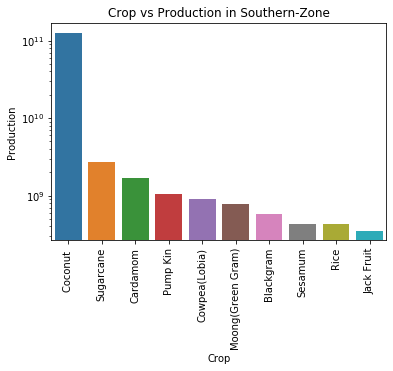

In [61]:
df_SZ= South_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(df_SZ.Crop, df_SZ.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Crop vs Production in Southern-Zone')

In [62]:
df_coco = final_df[final_df["Crop"]=="Coconut "]
print(df_coco.shape)
df_coco[:5]


(1985, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
5657,Andhra Pradesh,PRAKASAM,2000,Whole Year,Coconut,209.0,2240700.0,South Zone,None
5704,Andhra Pradesh,PRAKASAM,2001,Whole Year,Coconut,202.0,2195568.0,South Zone,None
5755,Andhra Pradesh,PRAKASAM,2002,Whole Year,Coconut,202.0,2267460.0,South Zone,None
5816,Andhra Pradesh,PRAKASAM,2003,Whole Year,Coconut,200.0,2369640.0,South Zone,None
5867,Andhra Pradesh,PRAKASAM,2004,Whole Year,Coconut,202.0,2373274.0,South Zone,None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


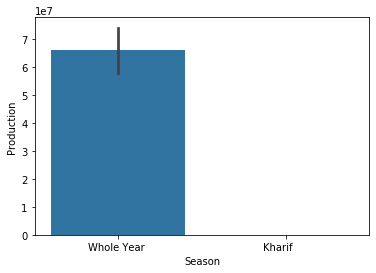

In [63]:
sns.barplot("Season","Production",data=df_coco)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

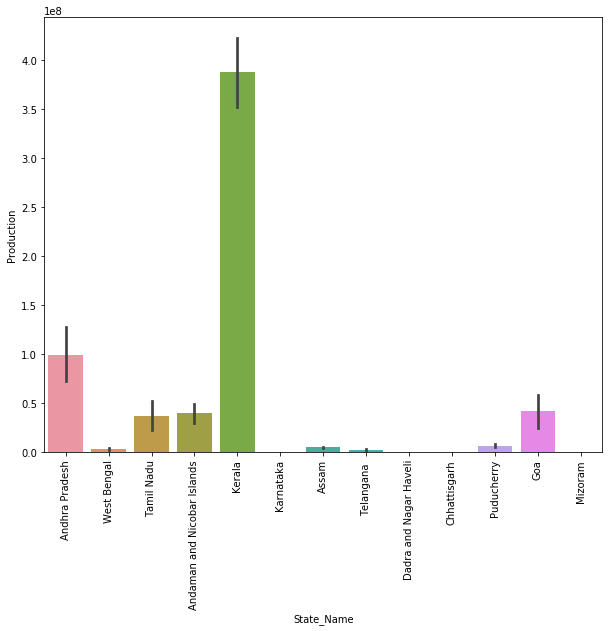

In [64]:
plt.figure(figsize=(10,8))
sns.barplot("State_Name","Production",data=df_coco)
plt.xticks(rotation=90)
plt.show

In [65]:
top_coco_dist = df_coco.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_coco_dist.head(5)

,District_Name,Production
80,KOZHIKODE,1.527871e+10
89,MALAPPURAM,1.451252e+10
134,THIRUVANANTHAPURAM,1.001337e+10
136,THRISSUR,9.920739e+09
66,KANNUR,9.780310e+09


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


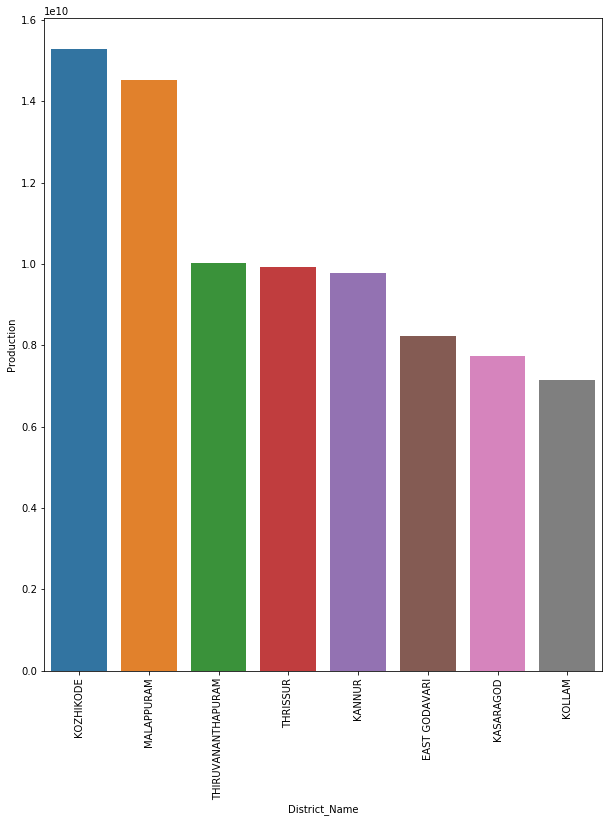

In [66]:
plt.figure(figsize=(10,12))
sns.barplot("District_Name","Production",data=top_coco_dist[:8])
plt.xticks(rotation=90)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


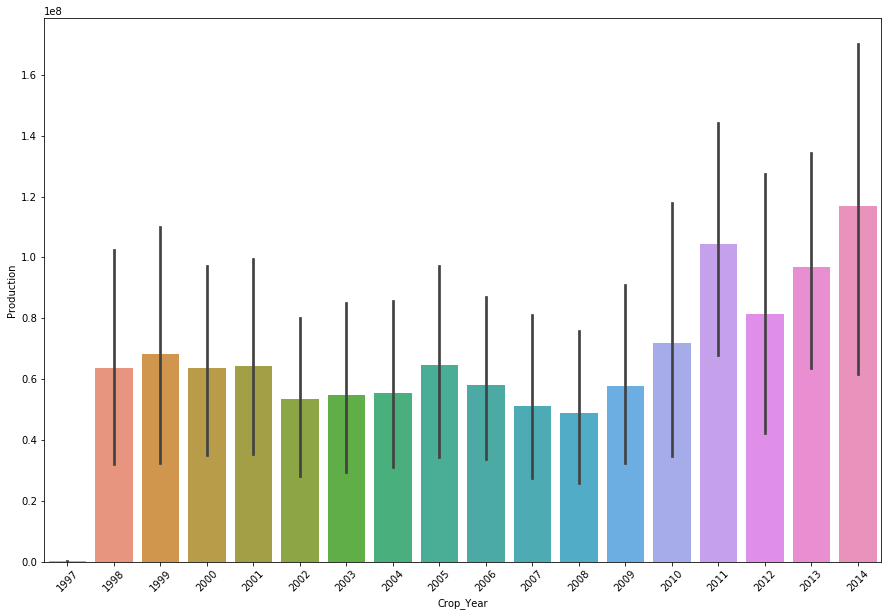

In [67]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=df_coco)
plt.xticks(rotation=45)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x720 with 0 Axes>

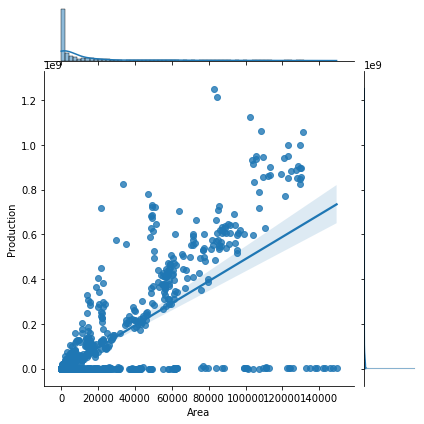

In [68]:
plt.figure(figsize=(15,10))
sns.jointplot("Area","Production",data=df_coco,kind="reg")
plt.xticks(rotation=90)
plt.show()

**Result:** 
1. Top crop grown in Southern Zone is coconut.
2. The coconut gets matured in Whole year season
3. Kerala state in southern zone yeilds a high amount of Coconut
4. Kozhikode and Malapuram districts of Kerala are rich in Coconut production
5. Coconut production was yeilded more during 2011 and 2014.
6. High coconut cultivation is directly proportional to area under cultivation.


### **Top crop produced in Central state**

In [69]:
Central_Zone=final_df[final_df["Zones"]=="Central Zone"]
print(Central_Zone.shape)

(33652, 9)


In [70]:
Central_Zone.head(8)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
122679,Madhya Pradesh,SIDHI,1997,Kharif,Arhar/Tur,32800.0,16700.0,Central Zone,Pulses
122680,Madhya Pradesh,SIDHI,1997,Kharif,Jowar,16900.0,10800.0,Central Zone,Cereal
122681,Madhya Pradesh,SIDHI,1997,Kharif,Maize,35500.0,32000.0,Central Zone,Cereal
122682,Madhya Pradesh,SIDHI,1997,Kharif,Paddy,105800.0,43800.0,Central Zone,Cereal
122683,Madhya Pradesh,SIDHI,1997,Kharif,Sesamum,22600.0,3000.0,Central Zone,oilseeds
122684,Madhya Pradesh,SIDHI,1997,Kharif,Small millets,68300.0,20300.0,Central Zone,Cereal
122685,Madhya Pradesh,SIDHI,1997,Kharif,Soyabean,700.0,400.0,Central Zone,Beans
122686,Madhya Pradesh,SIDHI,1997,Rabi,Barley,26300.0,24100.0,Central Zone,Cereal


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top crop produced in Central zone')

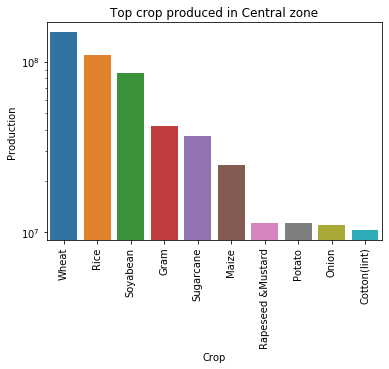

In [75]:
df_central_crop = Central_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(df_central_crop.Crop,df_central_crop.Production)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top crop produced in Central zone")


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,State_Name,Production
1,Madhya Pradesh,4.555427e+08
0,Chhattisgarh,1.055266e+08


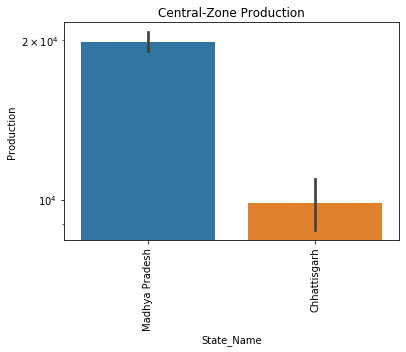

In [76]:
sns.barplot(Central_Zone.State_Name,Central_Zone.Production)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Central-Zone Production')

Central_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

**Result:** 
1. Wheat is the top crop produced in Central Zone
2. State rich in Wheat production is Madhya Pradesh

### **Crop categories and their Production rate**

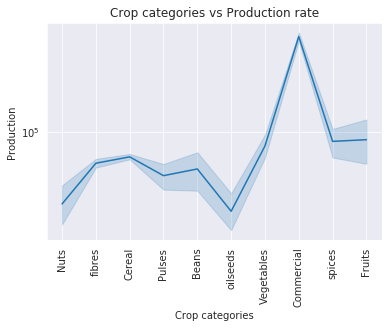

,cat_crop,Production
2,Commercial,6.612507e+09
1,Cereal,3.944948e+09
9,spices,1.827835e+09
5,Pulses,1.799547e+09
6,Vegetables,1.775118e+09
8,oilseeds,7.527392e+08
7,fibres,5.581822e+08
3,Fruits,5.360099e+08
0,Beans,4.590149e+08
4,Nuts,2.913803e+08


In [83]:
sns.set_style('darkgrid')
sns.lineplot(data=final_df, x='cat_crop', y='Production')

plt.title('Crop categories vs Production rate')
plt.xlabel('Crop categories')
plt.ylabel('Production')
plt.xticks(rotation=90);
plt.yscale('log')

plt.show()

final_df.groupby(by='cat_crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

**Result:** Commercial crops like Tobacco , Coffee , Tea , Rubber and Sugar cane has given the largest production